In [1]:
import os 
from os import listdir 
from os.path import isfile, join
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img

matrix = []

for filename in os.listdir('Train1'):
    face = img.imread((os.path.join('Train1',filename)))
    img2 = np.array(face).flatten()
    matrix.append(img2)
    
# image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
# plt.imshow(image, interpolation='nearest') #display the image 
# plt.gray()  #grayscale conversion
# plt.show()

# img2 = image.flatten()



In [2]:
# read the first 10 rows and columns of the image
matrix

[array([130, 128, 127, ..., 129, 129, 129], dtype=uint8),
 array([133, 124, 129, ..., 130, 130, 130], dtype=uint8),
 array([127, 129, 133, ..., 129, 129, 129], dtype=uint8),
 array([129, 137, 123, ..., 130, 130, 130], dtype=uint8),
 array([132, 132, 135, ..., 130, 130, 130], dtype=uint8),
 array([129, 129, 129, ..., 129, 129, 129], dtype=uint8),
 array([133, 130, 130, ..., 129, 129, 129], dtype=uint8),
 array([131, 130, 130, ..., 131, 131, 131], dtype=uint8),
 array([128, 134, 133, ..., 130, 130, 130], dtype=uint8),
 array([127, 134, 120, ..., 128, 128, 128], dtype=uint8),
 array([128, 126, 127, ..., 128, 128, 128], dtype=uint8),
 array([136, 130, 129, ..., 129, 129, 129], dtype=uint8),
 array([125, 129, 131, ..., 129, 129, 129], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([130, 122, 129, ..., 129, 129, 129], dtype=uint8),
 array([124, 126, 129, ..., 129, 129, 129], dtype=uint8),
 array([128, 1

In [3]:
faces_matrix = np.vstack(matrix)
faces_matrix
faces_matrix.shape

(3772, 19500)

In [4]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape


(19500,)

(3772, 19500)

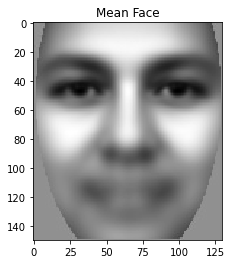

In [5]:
plt.imshow(mean_face.reshape(150,130),interpolation='nearest');
plt.gray()
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

In [6]:
#calculating the covariance but differently
# cov = (faces_norm.T @ faces_norm) / (faces_norm.shape[0]-1)

eigen_vecs, eigen_vals, yuna_val = np.linalg.svd(faces_norm)
eigen_vecs.shape


(3772, 3772)

In [24]:
M = faces_norm.T @ faces_norm

In [11]:
print(len(faces_norm[0]))
print(len(faces_norm))
print(eigen_vecs.shape)
print(eigen_vals.shape)
print(yuna_val.shape)
eigen_vecs

19500
3772
(3772, 3772)
(3772,)
(19500, 19500)


array([[-0.0081358 ,  0.00854096, -0.01505049, ..., -0.00042706,
         0.00101576,  0.01628224],
       [ 0.02024993,  0.01930073, -0.00696052, ...,  0.00550067,
         0.00295471,  0.01628224],
       [ 0.01857275,  0.01895537, -0.01496155, ...,  0.00860255,
         0.0073345 ,  0.01628224],
       ...,
       [ 0.01552093, -0.03654746,  0.01968337, ...,  0.00295515,
        -0.01065008,  0.01628224],
       [ 0.00015756,  0.01588133, -0.02676605, ...,  0.00193177,
        -0.00184793,  0.01628224],
       [-0.00051668,  0.01170239, -0.02660769, ..., -0.00564287,
         0.00309133,  0.01628224]])

In [25]:
eigen_vals, eigen_vecs = np.linalg.eig(M)
# # M.shape
eigen_vecs
# # eigen_vals
eigen_vecs.shape

array([[-2.84924670e-05+0.00000000e+00j, -2.89520239e-05+0.00000000e+00j,
        -1.28034956e-04+0.00000000e+00j, ...,
        -4.77463284e-11+1.86610259e-11j, -4.77463284e-11-1.86610259e-11j,
        -3.63283045e-11+0.00000000e+00j],
       [ 1.75881945e-04+0.00000000e+00j,  1.99725306e-04+0.00000000e+00j,
         1.89706620e-04+0.00000000e+00j, ...,
         5.80609796e-13-2.16618335e-13j,  5.80609796e-13+2.16618335e-13j,
         4.44819027e-13+0.00000000e+00j],
       [ 1.03921376e-04+0.00000000e+00j,  9.43555275e-05+0.00000000e+00j,
        -2.87133738e-05+0.00000000e+00j, ...,
         5.79410789e-13-2.43100746e-13j,  5.79410789e-13+2.43100746e-13j,
         4.32081451e-13+0.00000000e+00j],
       ...,
       [ 3.07412973e-06+0.00000000e+00j,  2.29153526e-06+0.00000000e+00j,
        -4.13601008e-05+0.00000000e+00j, ...,
         1.34482109e-04+4.04290103e-04j,  1.34482109e-04-4.04290103e-04j,
         5.46625127e-04+0.00000000e+00j],
       [ 3.07412973e-06+0.00000000e+00j,  2.

In [32]:
u,s,v = np.linalg.svd(M)
u.shape

(19500, 19500)

<ipython-input-44-03049ca81c52>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  image = np.array(eigen_vecs, dtype=float)


Text(0.5, 0.98, 'First 10 Eigenfaces')

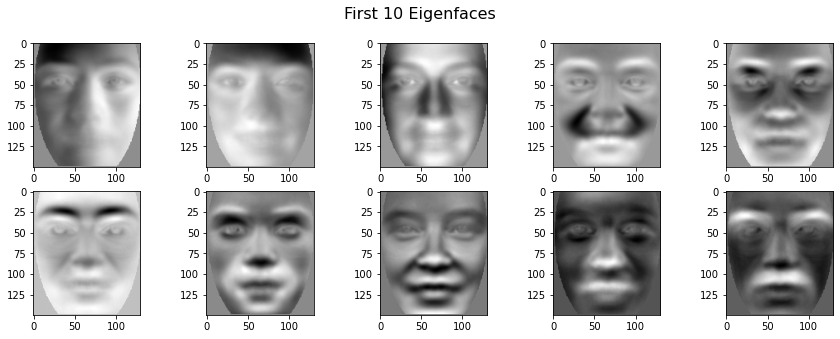

In [44]:
image = np.array(eigen_vecs, dtype=float)
fig, axs = plt.subplots(1,3,figsize=(15,5))

for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = image[:,i].reshape(150,130)
    plt.imshow(img, cmap='gray')
    
fig.suptitle("First 10 Eigenfaces", fontsize=16)

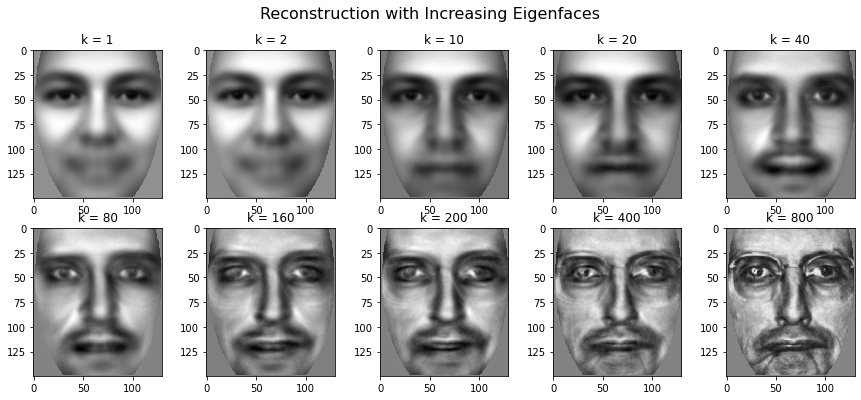

In [45]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(u[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(u[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(150,130)+mean_face.reshape(150,130),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);